,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


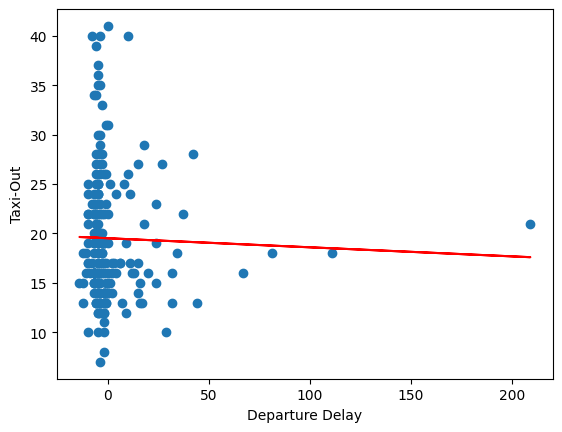

In [34]:
# LINEAR REGRESSION PREDICTING FLIGHT TAKEOFFS

##OLS MODEL###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

flight_data_df = pd.read_csv("M1_final.csv") #loading the data into a dataframe

display(flight_data_df)

#select variables (columns) for input and output
X = flight_data_df.iloc[1:1000:5,6].values.reshape(-1,1) #departure delay
Y = flight_data_df.iloc[1:1000:5,-1].values.reshape(-1,1) #taxi out

linear_regressor = LinearRegression() # create a linear regression object
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)


plt.scatter(X,Y)
plt.plot(X, Y_pred, color="red")
plt.xlabel("Departure Delay")
plt.ylabel("Taxi-Out")
plt.show()







In [22]:
# LASSO/RIDGE MODELLING

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

takeoff_data = pd.read_csv("M1_final.csv")

X = takeoff_data.iloc[:1001,12] #predictor variables
Y = takeoff_data.iloc[:1001,14] #variables to predict

lasso_model = Lasso(alpha=0.01)
ridge_model = Ridge(alpha=0.01)

# Training the model
lasso_model.fit(X,Y)
ridge_model.fit(X,Y)

# the new data to predict
predicted_data = takeoff_data.iloc[1000,12]

#making predictions
lasso_prediction = lasso_model.predict([predicted_data])
ridge_prediction = ridge_model.predict([predicted_data])

# summarise predictions
print("Predicted: %.3f" % lasso_prediction)
print("Predicted: %3f" % ridge_prediction)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.